In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (20,5)

In [3]:
df = pd.read_csv(f'../../data/processed_filtered/formality/Formality_bucket_Ingold.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Input,Output,Input_bucket,Output_bucket
0,0,1,"If not, then get a new girl freind.","if you don't, you'll have a new girl.",low,mid
1,1,3,"I have not seen it, but I would like to.","I didn't see it, but I'd like to.",high,mid
2,2,9,This is coming from a girl who does not care e...,it's a girl who doesn't care about her.,high,mid
3,3,17,i REALLY dont think thats likely.,I don't think it's likely.,low,mid
4,4,19,It is most likely not a grenade.,it's probably not a bomb.,high,mid


In [4]:
df.shape

(85837, 6)

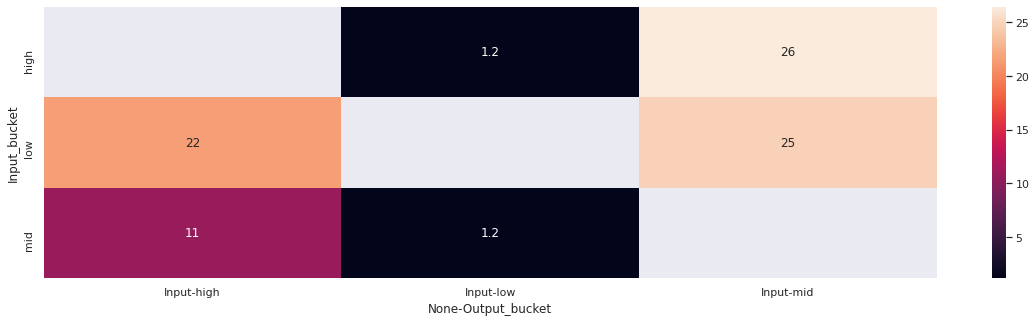

In [8]:
sns.heatmap(df.groupby(['Input_bucket','Output_bucket']).agg({'Input': 'count'}).reset_index().pivot('Input_bucket', 'Output_bucket')/1000, annot=True)
plt.show()

In [9]:
df = df.filter(['Output','Output_bucket','Input','Input_bucket'])

In [13]:
df = df.sample(frac=1).reset_index(drop=True)
df.columns = ['paraphrase','paraphrase_bucket','original','original_bucket']
df.head().T

,0,1,2,3,4
paraphrase,it's not an Aussie band I've just sang in the ...,I think he could be in jail.,"after she moved to me, she planned to rent it.","yes, yes, yes, no, yes, okay?","i'm like slipknot, but I've never heard of the..."
paraphrase_bucket,mid,mid,high,high,high
original,nope its not an aussie band i just sang in my ...,I believe he may have went to jail.,and was planning on renting it out after she m...,"yes means yes, and no means no, right?",i like slipknot but havnt heard of the other t...
original_bucket,low,high,mid,mid,low


In [14]:
train_samples = int(len(df)*0.8)
train_df = df[:train_samples]
dev_df = df[train_samples:]

In [16]:
train_df.to_csv('../../data/pseudo/formality/train.csv', header=False,index=False)
dev_df.to_csv('../../data/pseudo/formality/dev.csv', header=False, index=False)